In [1]:
import pandas as pd
df = pd.read_excel('C:\\Users\\Calvin\\Documents\\SES_STUDIO\\TheoreticalData.xlsx')
testdata = pd.read_excel('C:\\Users\\Calvin\\Documents\\SES_STUDIO\\TestMon.xlsx')
df.head()


,Time,Day,Week,Month,Year,Category
0,0,1,3,1,2022,Sleep
1,30,1,3,1,2022,Sleep
2,60,1,3,1,2022,Sleep
3,90,1,3,1,2022,Sleep
4,120,1,3,1,2022,Sleep


In [2]:
x=df.drop(['Category'], axis = 1)
y=df['Category']
x2 = testdata.drop(['Category'], axis = 1)
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Time,1680.0,705.000000,415.725719,0.0,352.5,705.0,1057.5,1410.0
Day,1680.0,3.000000,2.000596,0.0,1.0,3.0,5.0,6.0
Week,1680.0,5.285714,1.485057,3.0,4.0,5.0,7.0,8.0
Month,1680.0,1.600000,0.490044,1.0,1.0,2.0,2.0,2.0
Year,1680.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=13)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

['Leisure' 'Blank' 'Work' 'Sleep' 'Leisure' 'Sleep' 'Work' 'Education'
 'Sleep' 'Leisure' 'Blank' 'Leisure' 'Work' 'Blank' 'Education' 'Sleep'
 'Sleep' 'Sleep' 'Work' 'Sleep' 'Sleep' 'Blank' 'Sleep' 'Blank' 'Sleep'
 'Work' 'Leisure' 'Work' 'Work' 'Leisure' 'Blank' 'Sleep' 'Blank'
 'Leisure' 'Sleep' 'Education' 'Work' 'Sleep' 'Blank' 'Blank' 'Blank'
 'Work' 'Work' 'Work' 'Work' 'Work' 'Leisure' 'Leisure' 'Sleep' 'Sleep'
 'Blank' 'Sleep' 'Sleep' 'Work' 'Work' 'Sleep' 'Leisure' 'Blank' 'Sleep'
 'Sleep' 'Leisure' 'Work' 'Leisure' 'Leisure' 'Leisure' 'Sleep' 'Work'
 'Work' 'Work' 'Sleep' 'Leisure' 'Leisure' 'Work' 'Leisure' 'Sleep'
 'Leisure' 'Sleep' 'Sleep' 'Sleep' 'Leisure' 'Work' 'Sleep' 'Blank'
 'Sleep' 'Work' 'Sleep' 'Sleep' 'Sleep' 'Sleep' 'Work' 'Blank' 'Blank'
 'Blank' 'Work' 'Blank' 'Sleep' 'Sleep' 'Work' 'Blank' 'Blank' 'Sleep'
 'Leisure' 'Blank' 'Work' 'Sleep' 'Work' 'Work' 'Sleep' 'Sleep' 'Sleep'
 'Sleep' 'Work' 'Work' 'Blank' 'Sleep' 'Sleep' 'Leisure' 'Work' 'Blank'
 'Sleep' 'S

In [5]:
classifier.score(X_test, y_test)

0.8244047619047619

In [19]:
scaler.fit(x2)

x2 = scaler.transform(x2)
y2_pred = classifier.predict(x2)
print(y2_pred)
for x in classifier.predict_proba(x2):
    print(x)

['Sleep' 'Sleep' 'Sleep' 'Sleep' 'Sleep' 'Sleep' 'Sleep' 'Sleep' 'Sleep'
 'Sleep' 'Sleep' 'Sleep' 'Sleep' 'Sleep' 'Sleep' 'Sleep' 'Blank' 'Work'
 'Work' 'Work' 'Work' 'Work' 'Work' 'Work' 'Work' 'Work' 'Work' 'Work'
 'Work' 'Work' 'Work' 'Work' 'Work' 'Work' 'Blank' 'Blank' 'Blank' 'Blank'
 'Blank' 'Blank' 'Blank' 'Blank' 'Blank' 'Blank' 'Blank' 'Blank' 'Blank'
 'Blank']
[0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0.]
[0.05 0.   0.   0.   0.   0.95 0.  ]
[0.1 0.  0.  0.  0.  0.9 0. ]
[0.15 0.   0.   0.   0.   0.85 0.  ]
[0.15 0.   0.   0.   0.   0.85 0.  ]
[0.2  0.   0.   0.   0.   0.75 0.05]
[0.25 0.   0.   0.   0.   0.65 0.1 ]
[0.3  0.   0.   0.   0.   0.55 0.15]
[0.35 0.   0.   0.   0.   0.4  0.25]
[0.35 0.   0.   0.   0.   0.35 0.3 ]
[0.35 0.   0.   0.   0.   0.2  0.45]
[0.35 0.   0.   0.   0.   0.1  0.55]
[0.2  0.   0.   0.   0.   0.05 0.75]
[0.15

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       Blank       0.45      0.55      0.50        47
   Education       0.90      0.79      0.84        33
     Fitness       0.38      0.33      0.35         9
     Leisure       0.90      0.88      0.89        51
       Sleep       0.95      0.94      0.94       112
        Work       0.90      0.86      0.88        84

    accuracy                           0.82       336
   macro avg       0.74      0.73      0.73       336
weighted avg       0.84      0.82      0.83       336

[[ 26   2   5   2   5   7]
 [  6  26   0   0   0   1]
 [  6   0   3   0   0   0]
 [  4   1   0  45   1   0]
 [  4   0   0   3 105   0]
 [ 12   0   0   0   0  72]]


In [8]:
import numpy as np
error = []
from sklearn.metrics import mean_absolute_error
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = knn.score(X_test, y_test)
    error.append(mae)

maxElement = np.amax(error)
print('Max element from Numpy Array : ', maxElement)

Max element from Numpy Array :  0.8244047619047619


Text(0, 0.5, 'Mean Absolute Error')

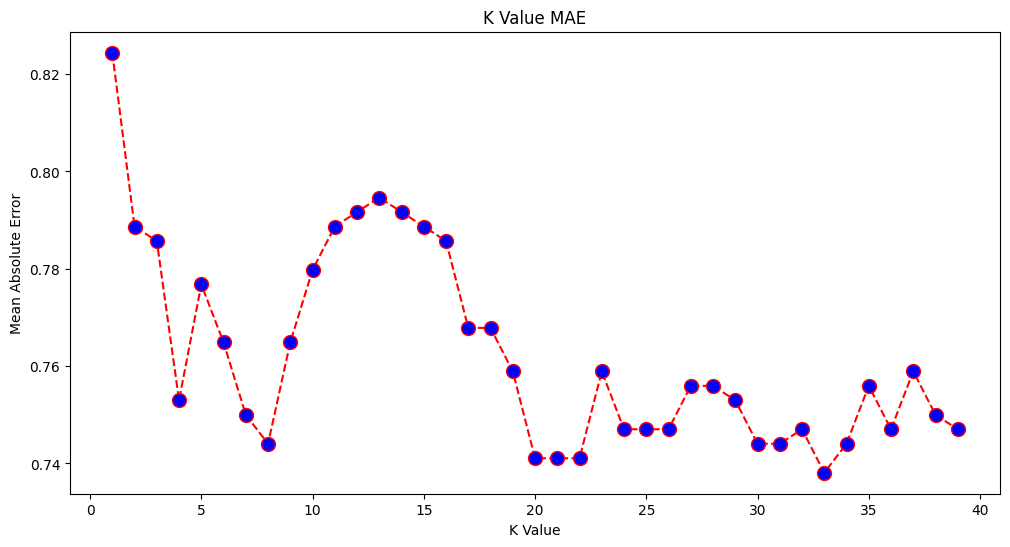

In [9]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [10]:
import sys
!{sys.executable} -m pip install matplotlib